<a href="https://colab.research.google.com/github/Jaime44/WorkSpace/blob/main/models/neural%20network/00_NN_Recommender_system_movie.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
# import os
# import sys
# try:
#     import google.colab
#     IN_COLAB = True
# except:
#     IN_COLAB = False

# path_absolute = ''
# if IN_COLAB:
#     print("El código se está ejecutando en Google Colab.")
#     from google.colab import drive

#     drive.mount('/content/drive')
#     path_absolute = '/content/drive/Othercomputers/Mi_portátil/TFM/WorkSpace/Models/neural network'

#     # Cambia al directorio de tu carpeta en Google Drive
#     os.chdir(path_absolute)

#     # Lista los archivos y carpetas en el directorio actual
#     contenido_carpeta = os.listdir(path_absolute)
#     print("Contenido de la carpeta en Google Drive:")
#     print(contenido_carpeta)
# else:
#     print("El código se está ejecutando en un entorno local.")
#     path_absolute = os.getcwd().replace("\\", "/")
#     path_absolute = 'C:/Users/jaime/OneDrive - Universidad de Málaga/Escritorio/UNIR/TFM/WorkSpace/Models/neural network'

# datasets_path = "/datasets/"
# path_absolute = path_absolute+datasets_path

# path_workspace ='C:/Users/jaime/OneDrive - Universidad de Málaga/Escritorio/UNIR/TFM/WorkSpace/'
# sys.path.append(path_workspace)

In [7]:
import os
import sys

# Comprueba si el código se está ejecutando en Google Colab
try:
    import google.colab
    IN_COLAB = True
except:
    IN_COLAB = False

path_absolute = ''
if IN_COLAB:
    print("El código se está ejecutando en Google Colab.")
    from google.colab import drive
    import tensorflow as tf
    print("Versión de TensorFlow:", tf.__version__)
    print("Dispositivos disponibles:", tf.config.list_physical_devices())

    drive.mount('/content/drive')
    path_absolute = '/content/drive/Othercomputers/Mi_portátil/TFM/WorkSpace/Models/neural network'

    path_workspace = '/content/drive/Othercomputers/Mi_portátil/TFM/WorkSpace/'

    # Cambia al directorio de tu carpeta en Google Drive
    os.chdir(path_absolute)

    # Lista los archivos y carpetas en el directorio actual
    contenido_carpeta = os.listdir(path_absolute)
    print("Contenido de la carpeta en Google Drive:")
    print(contenido_carpeta)

    # Verificar la GPU
    device_name = tf.test.gpu_device_name()
    if device_name != '/device:GPU:0':
        raise SystemError('GPU no encontrada')
    print(f'Encontrada GPU: {device_name}')

    # Habilitar la GPU para TensorFlow
    physical_devices = tf.config.list_physical_devices('GPU')
    if len(physical_devices) > 0:
        tf.config.experimental.set_memory_growth(physical_devices[0], True)
        print('Memoria de la GPU configurada dinámicamente')
    else:
        print('No se encontraron dispositivos GPU configurables')
else:
    print("El código se está ejecutando en un entorno local.")
    path_workspace ='C:/Users/jaime/OneDrive - Universidad de Málaga/Escritorio/UNIR/TFM/WorkSpace/'
    path_absolute = os.getcwd().replace("\\", "/")
    path_absolute = 'C:/Users/jaime/OneDrive - Universidad de Málaga/Escritorio/UNIR/TFM/WorkSpace/Models/neural network'

datasets_path = "/datasets/"
path_absolute = path_absolute+datasets_path


sys.path.append(path_workspace)

El código se está ejecutando en Google Colab.
Versión de TensorFlow: 2.15.0
Dispositivos disponibles: [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Contenido de la carpeta en Google Drive:
['movie-recommender-systems-using-neural-network.ipynb', 'nn_rs.ipynb', 'cf-based-recsys-by-low-rank-matrix-factorization_Original.ipynb', 'datasets', 'rec-sys-collaborative-filtering-dl-techniques_Original.ipynb', 'recommender-system-with-artificial-neural-networks.ipynb', 'recommender-system-with-artificial-neural-networks_Original.ipynb', 'movie-recommender-systems-using-neural-network_Original.ipynb', 'cf-based-recsys-by-low-rank-matrix-factorization.ipynb', 'XX_collaborative-filtering-nn.ipynb', 'XX_collaborative-filtering-nn_Original.ipynb', 'nn_rs_colab.ipynb', 'rec-sys-collaborati

In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib as mpl
import Utils.utils as util
import matplotlib.pyplot as plt


from keras import backend as K
from keras.models import Model
from IPython.display import SVG
from wordcloud import WordCloud
from keras.callbacks import EarlyStopping
# from keras.utils.vis_utils import model_to_dot
from tensorflow.keras.utils import plot_model
from sklearn.model_selection import train_test_split
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.layers import Dense,Dropout,Flatten,Embedding,BatchNormalization,Concatenate,Add,Concatenate,Dot,Input,dot,concatenate




# Configure visualisations
%matplotlib inline
mpl.style.use( 'ggplot' )
plt.style.use('fivethirtyeight')
sns.set(context="notebook", palette="dark", style = 'whitegrid' , color_codes=True)

In [9]:
# dataFrame = pd.read_csv(path_absolute+'df_movies_rating_2.csv', sep=',')
# data = dataFrame.copy()

# tamano_muestra = 60000
# # Obtiene una muestra aleatoria uniforme del DataFrame
# data = data.sample(n=tamano_muestra, random_state=42)  # random_state para reproducibilidad


# # Quito las calumnas categoricas de título y tag ambas estan represnetadas en las columnas númericas de tag_encode e id movie.
# # util.contar_ocurrencias(data, '(no genres listed)')
# # util.mostrar_filas_por_valor(data, '(no genres listed)', 1)

# # Total de clases(Puntuaciones) a predecir
# # 4.0,5.0,3.5,4.5,3.0,2.5,1.0,1.5,0.5
# data = util.eliminar_columnas(data, ['tag', 'title', '(no genres listed)'])
# util.contar_ocurrencias(data, 'rating')

# data = util.eliminar_columnas(data, ['timestamp_tags', 'timestamp_scr'])

# data.head()

In [10]:
#Carga de datos y preprocesado

dataFrame = pd.read_csv(path_absolute+'/df_mezclado_tags_ratings_movies_links_genTags.csv')

print(dataFrame.shape)

data = dataFrame.copy()
# data = data.sample(n=100000, random_state=42)

# Inserta la columna 'rating' en la última posición del DataFrame
data.insert(len(data.columns)-1, 'rating', data.pop('rating'))
# Inserta la columna 'relevance' en la penúltima posición del DataFrame
data.insert(len(data.columns)-2, 'relevance', data.pop('relevance'))
# Inserta la columna 'tag_etiquetas_genómicas' despues de tag_df_mezclado
data.insert(5, 'tag_etiquetas_genómicas', data.pop('tag_etiquetas_genómicas'))

# Renombrar algunas columnas:
data.rename(columns={'timestamp_valoraciones': 'timestamp_rt', 'timestamp_etiquetas': 'timestamp_tags',
                     'tag_df_mezclado_tags_ratings_movies_links_genMov': 'tag_by_user',
                     'tag_etiquetas_genómicas': 'gen_tag'}, inplace=True)

# Elimino las columnas:
columnas_a_eliminar = ['imdbId', 'tmdbId']
data = data.drop(columnas_a_eliminar, axis=1)
print(data.shape)
df = data.copy()
df.head()

(8949372, 13)
(100000, 11)


,userId,movieId,timestamp_rt,tag_by_user,timestamp_tags,gen_tag,title,genres,tagId,relevance,rating
1561133,60101,2571,1053445162,dystopia,1244667471,hitman,"Matrix, The (1999)",Action|Sci-Fi|Thriller,512,0.12625,5.0
1499330,42923,1228,1330057917,classic,1330057913,nocturnal,Raging Bull (1980),Drama,710,0.60700,4.0
1048680,7620,34532,1144937579,Magick,1144937622,true story,"Skeleton Key, The (2005)",Drama|Horror|Mystery|Thriller,1047,0.05750,5.0
1703441,62199,5636,1199318408,Anthony Russo,1328741490,adoption,Welcome to Collinwood (2002),Comedy|Crime,27,0.05325,3.0
5648649,29801,6250,1476349149,Stephen King,1476349186,cult film,Dreamcatcher (2003),Drama|Horror|Sci-Fi|Thriller,276,0.36500,2.0


## Explore dataset

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 1561133 to 5522545
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   userId          100000 non-null  int64  
 1   movieId         100000 non-null  int64  
 2   timestamp_rt    100000 non-null  int64  
 3   tag_by_user     100000 non-null  object 
 4   timestamp_tags  100000 non-null  int64  
 5   gen_tag         100000 non-null  object 
 6   title           100000 non-null  object 
 7   genres          100000 non-null  object 
 8   tagId           100000 non-null  int64  
 9   relevance       100000 non-null  float64
 10  rating          100000 non-null  float64
dtypes: float64(2), int64(5), object(4)
memory usage: 9.2+ MB


In [12]:
# Valores nulos
print(f"Valores nulos para la columna userId: {df['userId'].isnull().sum()}")
print(f"Valores nulos para la columna rating: {df['rating'].isnull().sum()}")
print(f"Valores nulos para la columna movieId: {df['movieId'].isnull().sum()}")

Valores nulos para la columna userId: 0
Valores nulos para la columna rating: 0
Valores nulos para la columna movieId: 0


In [13]:
# Se cuenta los valores unicos de rating
df['rating'].value_counts()

4.0    23098
5.0    21117
4.5    17088
3.5    15214
3.0     9974
2.5     4987
2.0     3648
1.5     1873
1.0     1609
0.5     1392
Name: rating, dtype: int64

In [14]:
# Se cuenta los valores unicos de usuarios
df['userId'].value_counts()

6550      2544
160540    1458
155146    1405
131347    1122
14116     1026
          ... 
62351        1
51731        1
51759        1
133247       1
110          1
Name: userId, Length: 6938, dtype: int64

In [15]:
# Se cuenta los valores unicos de peliculas
df['movieId'].value_counts()

296       976
260       768
2571      615
79132     528
318       407
         ... 
2346        1
5734        1
1411        1
4804        1
178667      1
Name: movieId, Length: 8646, dtype: int64

In [16]:
rango_valores = df['rating'].describe()['min'], df['rating'].describe()['max']
print("Rango de valores cd rating:", rango_valores)

Rango de valores cd rating: (0.5, 5.0)


In [17]:
#promedio de calificaciones agrupado por titulos
df.groupby('title')['rating'].mean().sort_values(ascending=False).head(10)

title
Balto (1995)                                                             5.0
Crimson Permanent Assurance, The (1983)                                  5.0
Man Who Shot Liberty Valance, The (1962)                                 5.0
Cremator, The (Spalovac mrtvol) (1969)                                   5.0
Man Who Planted Trees, The (Homme qui plantait des arbres, L') (1987)    5.0
Ghost in the Shell 2.0 (2008)                                            5.0
Interstella 5555: The 5tory of the 5ecret 5tar 5ystem (2003)             5.0
Into the Woods (1991)                                                    5.0
Ghost and the Darkness, The (1996)                                       5.0
Brice Man, The (Brice de Nice) (2005)                                    5.0
Name: rating, dtype: float64

In [18]:
# Cuantos generos distintos hay y cuantqas peliculas clasificadas con ese genero entre otros.
genres = {}
def find_genres():
    for genre in df['genres']:
        words = genre.split('|')
        for word in words:
            genres[word] = genres.get(word, 0) + 1
find_genres()
genres['None'] = genres.pop('(no genres listed)')
genres

{'Action': 28846,
 'Sci-Fi': 24781,
 'Thriller': 31171,
 'Drama': 49928,
 'Horror': 10191,
 'Mystery': 10648,
 'Comedy': 27966,
 'Crime': 17386,
 'Adventure': 21536,
 'Fantasy': 11986,
 'War': 4227,
 'IMAX': 6303,
 'Documentary': 1280,
 'Romance': 15987,
 'Musical': 2568,
 'Animation': 5934,
 'Children': 5012,
 'Western': 1260,
 'Film-Noir': 1352,
 'None': 173}

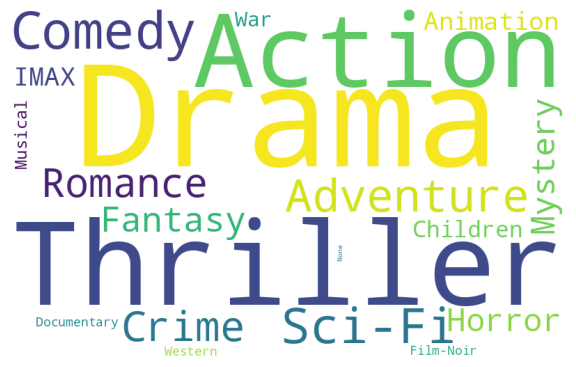

In [19]:
# Nube de palabras para los generos
wordcloud = WordCloud(width=800, height=500, background_color = 'white',
                      min_font_size=6, contour_color='black', contour_width=2).generate_from_frequencies(genres)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [20]:
#Peliculas más puntuadas
df_n_ratings = pd.DataFrame(df.groupby('title')['rating'].mean())
df_n_ratings['total ratings'] = pd.DataFrame(df.groupby('title')['rating'].count())
df_n_ratings.rename(columns = {'rating': 'mean ratings'}, inplace=True)
df_n_ratings.sort_values('total ratings', ascending=False).head(10)

,mean ratings,total ratings
title,,
Pulp Fiction (1994),4.416496,976
Star Wars: Episode IV - A New Hope (1977),4.174479,768
"Matrix, The (1999)",4.398374,615
Inception (2010),4.500947,528
"Shawshank Redemption, The (1994)",4.620393,407
"Amelie (Fabuleux destin d'Amélie Poulain, Le) (2001)",4.488943,407
Arrival (2016),4.258258,333
The Martian (2015),4.099010,303
"Dark Knight, The (2008)",4.357143,301


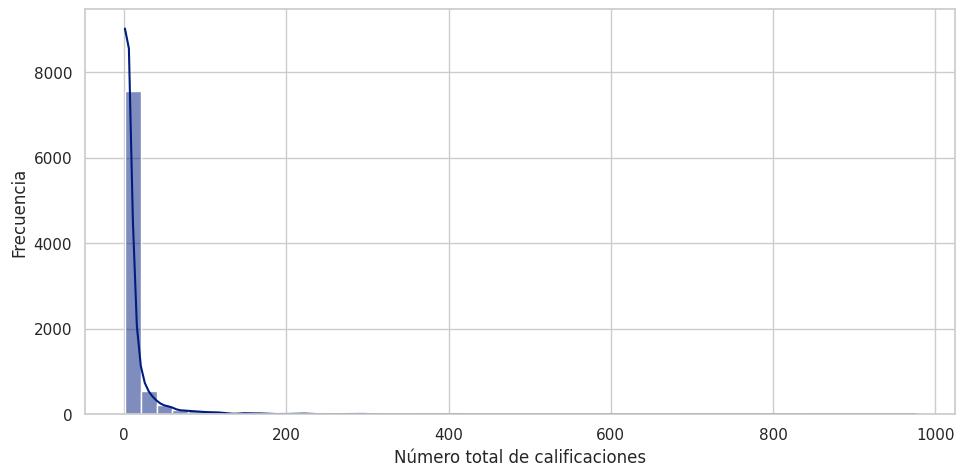

In [21]:
# histograma de la distribución de frecuencia del número total de calificaciones en el DataFrame
plt.figure(figsize=(10,5))
sns.histplot(df_n_ratings['total ratings'], bins=50, kde=True)  # kde=True incluye la estimación de densidad kernel
plt.xlabel('Número total de calificaciones')
plt.ylabel('Frecuencia')
plt.show()

In [22]:
# Calificaciones promedio más altas en función de la columna 'mean ratings'.
df_n_ratings.sort_values('mean ratings', ascending=False).head(10)

,mean ratings,total ratings
title,,
Balto (1995),5.0,1
"Crimson Permanent Assurance, The (1983)",5.0,1
"Man Who Shot Liberty Valance, The (1962)",5.0,1
"Cremator, The (Spalovac mrtvol) (1969)",5.0,1
"Man Who Planted Trees, The (Homme qui plantait des arbres, L') (1987)",5.0,1
Ghost in the Shell 2.0 (2008),5.0,1
Interstella 5555: The 5tory of the 5ecret 5tar 5ystem (2003),5.0,2
Into the Woods (1991),5.0,2
"Ghost and the Darkness, The (1996)",5.0,1


In [23]:
print('Nº total de usuarios que han valorado con 5,0 : ', len(df_n_ratings.loc[df_n_ratings['mean ratings'] == 5]), '\n')
print('Nº total de usuarios individuales que han valorado con 5,0 : ', len(df_n_ratings.loc[(df_n_ratings['mean ratings'] == 5)
                                                                           & (df_n_ratings['total ratings'] == 1)]))

Nº total de usuarios que han valorado con 5,0 :  318 

Nº total de usuarios individuales que han valorado con 5,0 :  226


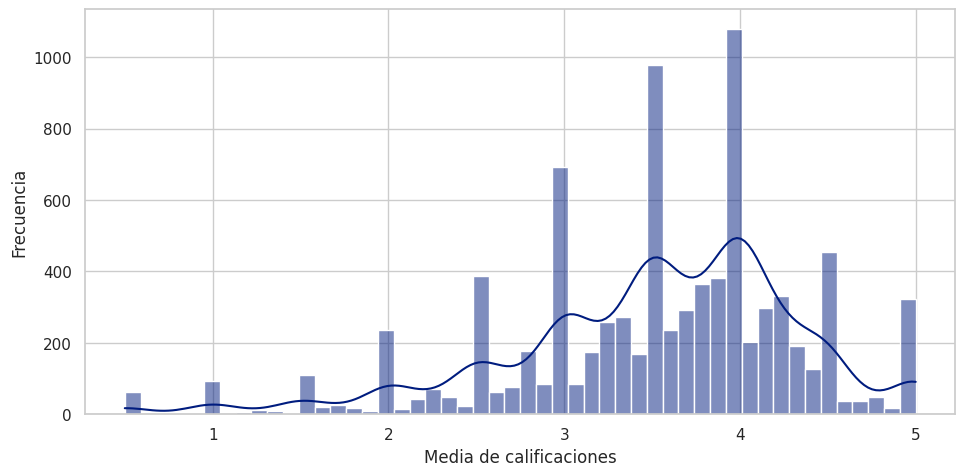

In [24]:
plt.figure(figsize=(10,5))
sns.histplot(df_n_ratings['mean ratings'], bins=50, kde=True)
plt.xlabel('Media de calificaciones')
plt.ylabel('Frecuencia')
plt.show()

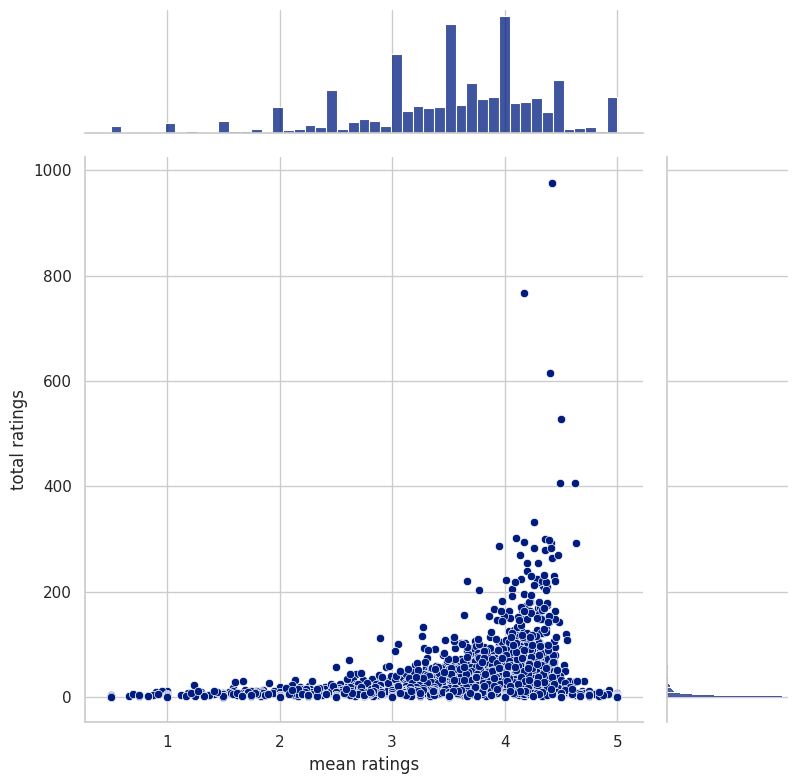

In [25]:
# Mean Ratings vs Total Number of Ratings
sns.jointplot(x='mean ratings', y='total ratings', data=df_n_ratings, height=8, ratio=4)


## MODELS

In [26]:
df.head(3)

,userId,movieId,timestamp_rt,tag_by_user,timestamp_tags,gen_tag,title,genres,tagId,relevance,rating
1561133,60101,2571,1053445162,dystopia,1244667471,hitman,"Matrix, The (1999)",Action|Sci-Fi|Thriller,512,0.12625,5.0
1499330,42923,1228,1330057917,classic,1330057913,nocturnal,Raging Bull (1980),Drama,710,0.60700,4.0
1048680,7620,34532,1144937579,Magick,1144937622,true story,"Skeleton Key, The (2005)",Drama|Horror|Mystery|Thriller,1047,0.05750,5.0


In [27]:

# La asignación de índices únicos y la posterior división del DataFrame en conjuntos de entrenamiento y
# prueba pueden ser necesarias por varias razones en el contexto de modelos de recomendación y
# aprendizaje automático en general:

# Índices numéricos: Algunos algoritmos y modelos de aprendizaje automático requieren que las
# entradas sean números enteros. Al asignar índices únicos a los usuarios y películas,
# se asegura de que cada entidad esté representada por un identificador numérico único,
# lo que facilita el procesamiento por parte de los modelos.

# Consistencia en los datos de entrada: Al asignar índices únicos y transformar los datos originales,
# se crea una representación consistente y única para cada usuario y película en el conjunto de datos.
# Esto facilita el manejo y la interpretación de los datos durante el preprocesamiento y el entrenamiento
# del modelo.

# Reproducibilidad: La división aleatoria del DataFrame en conjuntos de entrenamiento y
# prueba utilizando np.random.rand() con una semilla (random_state) proporciona reproducibilidad.
# Esto significa que si vuelves a ejecutar el código con la misma semilla, obtendrás la misma
# división de datos, lo que es útil para comparar resultados y depurar el código.

# Evaluación del modelo: La división en conjuntos de entrenamiento y prueba es esencial para
# evaluar el rendimiento del modelo. El conjunto de entrenamiento se utiliza para entrenar el modelo,
# mientras que el conjunto de prueba se reserva para evaluar su rendimiento en datos no vistos.

# En resumen, estas operaciones son prácticas comunes en el preprocesamiento de datos para modelos
# de aprendizaje automático, especialmente cuando se trata de conjuntos de datos que contienen
# variables categóricas o identificadores que deben ser representados de manera numérica y
# cuando se busca garantizar la consistencia y la reproducibilidad en el procesamiento de datos.

df_aux = df.copy()
# userId	movieId	timestamp_rt	tag_by_user	timestamp_tags	gen_tag	title	genres	tagId	relevance	rating
df_aux = df_aux[['userId', 'movieId','tag_by_user','genres','rating']]

# Crear diccionarios de asignación de índices únicos
user_unique_ids = df_aux['userId'].unique()
movie_unique_ids = df_aux['movieId'].unique()

userid2idx = {user_id: idx for idx, user_id in enumerate(user_unique_ids)}
movieid2idx = {movie_id: idx for idx, movie_id in enumerate(movie_unique_ids)}

# Aplicar la asignación de índices únicos al DataFrame
df_aux['userId'] = df_aux['userId'].apply(lambda x: userid2idx[x])
df_aux['movieId'] = df_aux['movieId'].apply(lambda x: movieid2idx[x])

# Dividir dataset en entrenamiento y test
X = df_aux[['userId', 'movieId']]  # UserId y movieId
Y = df_aux['rating']                # rating

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print(x_train.shape , x_test.shape)

(80000, 2) (20000, 2)


### Definicicón de parametros

In [28]:
# Definición del número de factores latentes
n_latent_factors = 50
# learning_rate = 5e-4
lr = 5e-4
#Función de perdida
loss_function = 'mse'
#Bartch
batch_size = 64
#Epoch
epochs = 150
#Paciencia early stopping
pte = 5

In [29]:
es = EarlyStopping(monitor="val_loss",
                   mode="min",
                   verbose=1,
                   patience=pte)

In [30]:
def train_model(model):
    # Entrenar el modelo y obtener el objeto history
    history = model.fit(x=[x_train['userId'], x_train['movieId']], y=y_train,
                        batch_size= batch_size, epochs=epochs, verbose= 1,
                        validation_data=([x_test['userId'], x_test['movieId']], y_test),
                        callbacks=[es])
    return history

In [31]:
def plot_loss(history):
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']

    fig, ax1 = plt.subplots(figsize=(10, 8))

    color = 'tab:red'
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss', color=color)
    ax1.plot(loss, 'r--', label='Training Loss')
    ax1.plot(val_loss, 'b-', label='Validation Loss')
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()
    color = 'tab:green'
    ax2.set_ylabel('Accuracy', color=color)
    ax2.plot(accuracy, 'g-.', label='Training Accuracy')
    ax2.plot(val_accuracy, 'y:', label='Validation Accuracy')
    ax2.tick_params(axis='y', labelcolor=color)

    # Añadir leyendas
    ax1.legend(loc='upper left')
    ax2.legend(loc='upper right')

    fig.tight_layout()
    plt.title('Model Loss and Accuracy')
    plt.show()


### Arquitectura 1

In [32]:
K.clear_session()
tf.random.set_seed(51)
np.random.seed(51)

In [33]:
# Obtención del número único de usuarios y películas en el conjunto de datos de calificaciones
n_users, n_movies = len(df['userId'].unique()), len(df['movieId'].unique())

# Definición de la entrada del usuario
user_input = Input(shape=(1,), name='User_Input')

# Creación de la capa de embedding para usuarios
user_embeddings = Embedding(input_dim=n_users, output_dim=n_latent_factors, input_length=1,
                            name='User_Embedding')(user_input)
user_vector = Flatten(name='User_Vector')(user_embeddings)

# Definición de la entrada de la película
movie_input = Input(shape=(1,), name='Movie_Input')

# Creación de la capa de embedding para películas
movie_embeddings = Embedding(input_dim=n_movies, output_dim=n_latent_factors, input_length=1,
                             name='Movie_Embedding')(movie_input)
movie_vector = Flatten(name='Movie_Vector')(movie_embeddings)

# Combinación de los vectores de usuario y película mediante el producto punto
merged_vectors = dot([user_vector, movie_vector], name='Dot_Product', axes=1)

# Creación del modelo utilizando Model API de Keras
model_a1 = Model([user_input, movie_input], merged_vectors)

model_a1.summary()
# Visualizar el modelo de Keras en formato DOT y luego lo convierte a formato SVG para mostrarlo
# SVG(model_to_dot( model_a1,  show_shapes=True, show_layer_names=True).create(prog='dot', format='svg'))

#Compilar modelo
model_a1.compile(loss=loss_function, optimizer = Adam(learning_rate=lr), metrics = ['accuracy'])

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 User_Input (InputLayer)     [(None, 1)]                  0         []                            
                                                                                                  
 Movie_Input (InputLayer)    [(None, 1)]                  0         []                            
                                                                                                  
 User_Embedding (Embedding)  (None, 1, 50)                346900    ['User_Input[0][0]']          
                                                                                                  
 Movie_Embedding (Embedding  (None, 1, 50)                432300    ['Movie_Input[0][0]']         
 )                                                                                            

Epoch 1/150
1250/1250 [==============================] - 10s 6ms/step - loss: 15.6015 - accuracy: 0.0000e+00 - val_loss: 15.0633 - val_accuracy: 0.0000e+00
Epoch 2/150
1250/1250 [==============================] - 5s 4ms/step - loss: 12.2786 - accuracy: 0.0046 - val_loss: 9.5126 - val_accuracy: 0.0102
Epoch 3/150
1250/1250 [==============================] - 4s 3ms/step - loss: 7.1172 - accuracy: 0.0121 - val_loss: 6.0993 - val_accuracy: 0.0138
Epoch 4/150
1250/1250 [==============================] - 4s 4ms/step - loss: 4.5473 - accuracy: 0.0145 - val_loss: 4.4398 - val_accuracy: 0.0152
Epoch 5/150
1250/1250 [==============================] - 5s 4ms/step - loss: 3.1610 - accuracy: 0.0153 - val_loss: 3.4915 - val_accuracy: 0.0154
Epoch 6/150
1250/1250 [==============================] - 5s 4ms/step - loss: 2.3150 - accuracy: 0.0156 - val_loss: 2.9055 - val_accuracy: 0.0155
Epoch 7/150
1250/1250 [==============================] - 5s 4ms/step - loss: 1.7613 - accuracy: 0.0157 - val_loss: 2.5

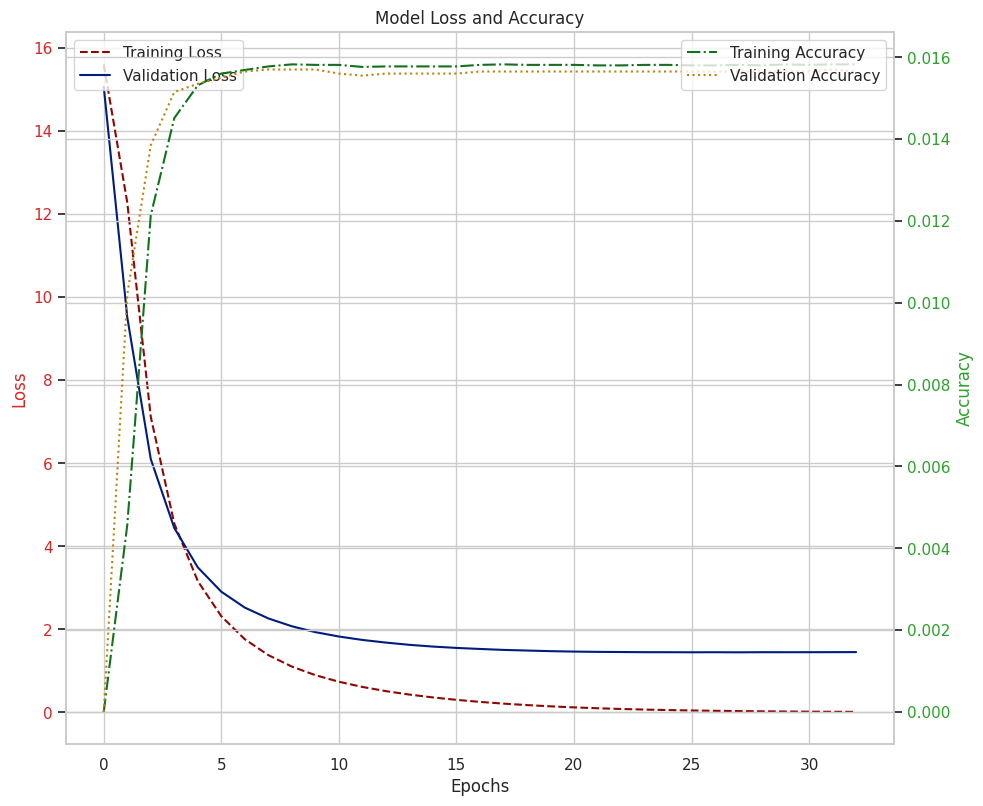

In [34]:
history_mda1 = train_model(model_a1)
plot_loss(history_mda1)

### Arquitectura 2

In [35]:
K.clear_session()
tf.random.set_seed(51)
np.random.seed(51)

In [37]:
# Obtener el número único de películas y usuarios en el DataFrame
n_movies = len(df['movieId'].unique())
n_users = len(df['userId'].unique())

# Definir la capa de entrada para el usuario con un solo valor entero (userId)
user_input = Input(shape=(1,), name='user_input', dtype='int64')

# Crear la capa de embedding para usuarios
user_embedding = Embedding(n_users, n_latent_factors, name='user_embedding')(user_input)
user_vec = Flatten(name='FlattenUsers')(user_embedding)  # Aplanar la salida de la capa de embedding
user_vec = Dropout(0.40)(user_vec)  # Aplicar Dropout para regularización

# Definir la capa de entrada para la película con un solo valor entero (movieId)
movie_input = Input(shape=(1,), name='movie_input', dtype='int64')

# Crear la capa de embedding para películas
movie_embedding = Embedding(n_movies, n_latent_factors, name='movie_embedding')(movie_input)
movie_vec = Flatten(name='FlattenMovies')(movie_embedding)  # Aplanar la salida de la capa de embedding
movie_vec = Dropout(0.40)(movie_vec)  # Aplicar Dropout para regularización

# Calcular la similitud entre los vectores de usuario y película mediante el producto punto
similarity = dot([user_vec, movie_vec], name='Similarity-Dot-Product', axes=1)

# Definir una capa de red neuronal para procesar la similitud calculada
nn_inp = Dense(96, activation='relu')(similarity)
nn_inp = Dropout(0.4)(nn_inp)  # Aplicar Dropout para regularización
# nn_inp = BatchNormalization()(nn_inp)  # Normalización por lotes (comentada, opcional)
nn_inp = Dense(1, activation='relu')(nn_inp)

# Crear el modelo utilizando Model API de Keras
model_a2 = Model([user_input, movie_input], nn_inp)
model_a2.summary()  # Mostrar resumen del modelo en términos de parámetros y capas

# Compilar el modelo con la función de pérdida y el optimizador especificados
model_a2.compile(loss=loss_function, optimizer= Adam(learning_rate=lr), metrics = ['accuracy'])


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 user_input (InputLayer)     [(None, 1)]                  0         []                            
                                                                                                  
 movie_input (InputLayer)    [(None, 1)]                  0         []                            
                                                                                                  
 user_embedding (Embedding)  (None, 1, 50)                346900    ['user_input[0][0]']          
                                                                                                  
 movie_embedding (Embedding  (None, 1, 50)                432300    ['movie_input[0][0]']         
 )                                                                                          

Epoch 1/150
1250/1250 [==============================] - 12s 7ms/step - loss: 3.2490 - accuracy: 0.0146 - val_loss: 1.0027 - val_accuracy: 0.0171
Epoch 2/150
1250/1250 [==============================] - 5s 4ms/step - loss: 1.0625 - accuracy: 0.0158 - val_loss: 0.8223 - val_accuracy: 0.0170
Epoch 3/150
1250/1250 [==============================] - 5s 4ms/step - loss: 0.8338 - accuracy: 0.0156 - val_loss: 0.7259 - val_accuracy: 0.0171
Epoch 4/150
1250/1250 [==============================] - 6s 5ms/step - loss: 0.7085 - accuracy: 0.0152 - val_loss: 0.6730 - val_accuracy: 0.0171
Epoch 5/150
1250/1250 [==============================] - 5s 4ms/step - loss: 0.6238 - accuracy: 0.0148 - val_loss: 0.6396 - val_accuracy: 0.0171
Epoch 6/150
1250/1250 [==============================] - 6s 4ms/step - loss: 0.5602 - accuracy: 0.0148 - val_loss: 0.6191 - val_accuracy: 0.0171
Epoch 7/150
1250/1250 [==============================] - 5s 4ms/step - loss: 0.5018 - accuracy: 0.0148 - val_loss: 0.6070 - val_a

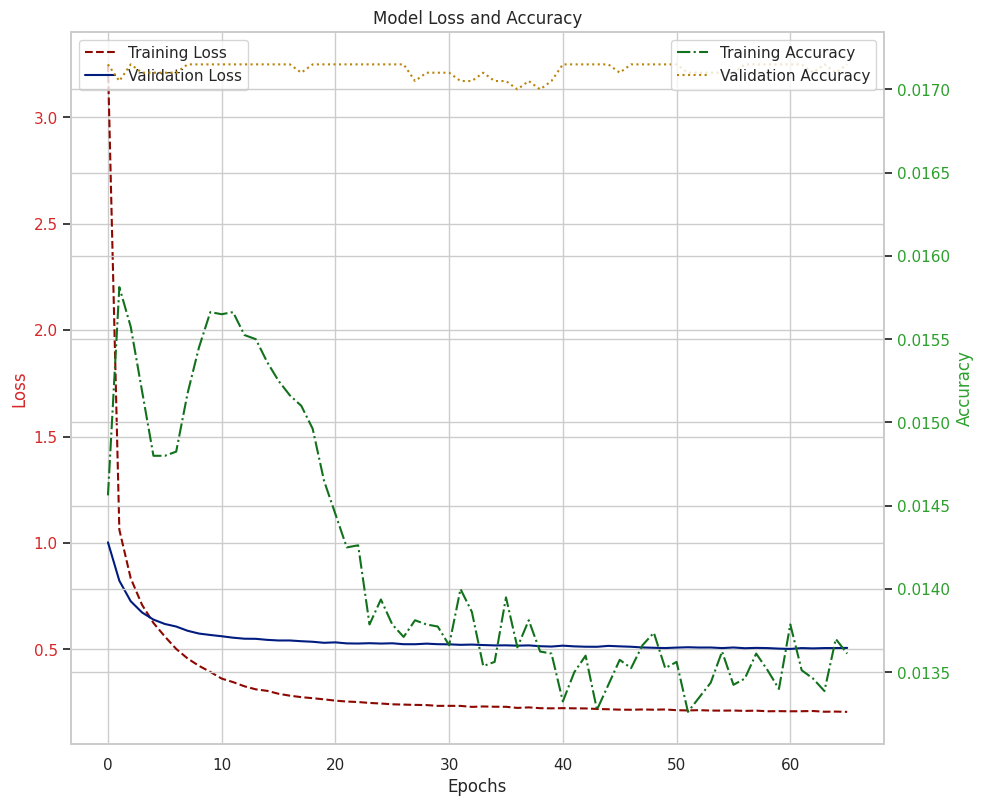

In [38]:
history_mda2 = train_model(model_a2)
plot_loss(history_mda2)

### Arquitectura 3

In [39]:
K.clear_session()
tf.random.set_seed(51)
np.random.seed(51)

In [43]:
# Obtener el número único de películas y usuarios en el DataFrame
n_movies = len(df['movieId'].unique())
n_users = len(df['userId'].unique())

# Definir la capa de entrada para el usuario con un solo valor entero (userId)
user_input = Input(shape=(1,), name='User_Input')

# Crear la capa de embedding para usuarios
user_embeddings = Embedding(input_dim=n_users+1, output_dim=n_latent_factors, input_length=1, name='User_Embedding')(user_input)
user_vector = Flatten(name='User_Vector')(user_embeddings)  # Aplanar la salida de la capa de embedding

# Definir la capa de entrada para la película con un solo valor entero (movieId)
movie_input = Input(shape=(1,), name='Movie_input')

# Crear la capa de embedding para películas
movie_embeddings = Embedding(input_dim=n_movies+1, output_dim=n_latent_factors, input_length=1, name='Movie_Embedding')(movie_input)
movie_vector = Flatten(name='Movie_Vector')(movie_embeddings)  # Aplanar la salida de la capa de embedding

# Concatenar los vectores de usuario y película
merged_vectors = concatenate([user_vector, movie_vector], name='Concatenation')

# Capa densa con 100 unidades y función de activación ReLU
dense_layer_1 = Dense(100, activation='relu')(merged_vectors)

# Aplicar Dropout para regularización
dense_layer_3 = Dropout(0.5)(dense_layer_1)

# Capa densa de salida con 1 unidad
dense_layer_2 = Dense(1)(dense_layer_3)

# Crear el modelo utilizando Model API de Keras
model_a3 = Model([user_input, movie_input], dense_layer_2)

# Compilar el modelo con la función de pérdida, el optimizador y métricas especificados
model_a3.compile(loss=loss_function, optimizer=Adam(learning_rate=5e-4), metrics=['accuracy'])
model_a3.summary()  # Mostrar resumen del modelo en términos de parámetros y capas


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 User_Input (InputLayer)     [(None, 1)]                  0         []                            
                                                                                                  
 Movie_input (InputLayer)    [(None, 1)]                  0         []                            
                                                                                                  
 User_Embedding (Embedding)  (None, 1, 50)                346950    ['User_Input[0][0]']          
                                                                                                  
 Movie_Embedding (Embedding  (None, 1, 50)                432350    ['Movie_input[0][0]']         
 )                                                                                          

In [ ]:
history_mda3 = train_model(model_a3)
plot_loss(history_mda3)

Epoch 1/150
1250/1250 [==============================] - 11s 8ms/step - loss: 2.5223 - accuracy: 0.0150 - val_loss: 0.7263 - val_accuracy: 0.0171
Epoch 2/150
1250/1250 [==============================] - 7s 5ms/step - loss: 0.8645 - accuracy: 0.0158 - val_loss: 0.6858 - val_accuracy: 0.0171
Epoch 3/150
1250/1250 [==============================] - 5s 4ms/step - loss: 0.7962 - accuracy: 0.0158 - val_loss: 0.6716 - val_accuracy: 0.0171
Epoch 4/150
1250/1250 [==============================] - 9s 7ms/step - loss: 0.7516 - accuracy: 0.0157 - val_loss: 0.6597 - val_accuracy: 0.0171
Epoch 5/150
1250/1250 [==============================] - 6s 5ms/step - loss: 0.7052 - accuracy: 0.0155 - val_loss: 0.6558 - val_accuracy: 0.0170
Epoch 6/150
1250/1250 [==============================] - 8s 6ms/step - loss: 0.6604 - accuracy: 0.0154 - val_loss: 0.6437 - val_accuracy: 0.0170
Epoch 7/150
1250/1250 [==============================] - 8s 7ms/step - loss: 0.6220 - accuracy: 0.0150 - val_loss: 0.6360 - val_a

### Arquitectura 4

In [ ]:
K.clear_session()
tf.random.set_seed(51)
np.random.seed(51)

In [ ]:
# Definición de la entrada del usuario (user_input)
user_input = Input(shape=[1], name='user')  # Capa de entrada para la información del usuario.
# print(f"User Input Shape: {user_input.shape}")

# Creación de la capa de embedding para usuarios (user_embedding)
user_embedding = Embedding(input_dim=n_users + 1, output_dim=n_latent_factors, name='user_embedding')(user_input)
# La capa de embedding asigna a cada usuario un vector en el espacio de factores latentes.
# print(f"User Embedding Shape: {user_embedding.shape}")

# Aplanamiento de la capa de embedding para usuarios (user_vec)
user_vec = Flatten(name='flatten_users')(user_embedding)
# Se aplana el embedding para obtener un vector unidimensional que representa al usuario en el espacio de factores latentes.
# print(f"Flattened User Vector Shape: {user_vec.shape}")

# Definición de la entrada de la película (movie_input)
movie_input = Input(shape=[1], name='movie')  # Capa de entrada para la información de la película.
# print(f"Movie Input Shape: {movie_input.shape}")

# Creación de la capa de embedding para películas (movie_embedding)
movie_embedding = Embedding(input_dim=n_movies + 1, output_dim=n_latent_factors, name='movie_embedding')(movie_input)
# La capa de embedding asigna a cada película un vector en el espacio de factores latentes.
# print(f"Movie Embedding Shape: {movie_embedding.shape}")

# Aplanamiento de la capa de embedding para películas (movie_vec)
movie_vec = Flatten(name='flatten_movies')(movie_embedding)
# Se aplana el embedding para obtener un vector unidimensional que representa la película en el espacio de factores latentes.
# print(f"Flattened Movie Vector Shape: {movie_vec.shape}")

# Cálculo del producto punto entre los vectores de película y usuario (product)
product = dot([movie_vec, user_vec], axes=1)
# El modelo calcula el producto punto entre los vectores de película y usuario para predecir las calificaciones.
# print(f"Product Shape: {product.shape}")

# Definición del modelo (model)
model_a4 = Model(inputs=[user_input, movie_input], outputs=product)

# Compilación del modelo con la función de pérdida y optimizador
model_a4.compile(loss=loss_function, optimizer = Adam(learning_rate=lr), metrics = ['accuracy'])

model_a4.summary()

In [ ]:
history_mda4 = train_model(model_a4)
plot_loss(history_mda4)

### Arquitectura 5

In [ ]:
K.clear_session()
tf.random.set_seed(51)
np.random.seed(51)

In [ ]:
# Definir la entrada del usuario y su embedding
user_input = Input(shape=[1], name='user')
user_embedding = Embedding(input_dim=n_users + 1, output_dim=n_latent_factors, name='user_embedding')(user_input)
user_vec = Flatten(name='flatten_users')(user_embedding)

# Definir la entrada de la película y su embedding
movie_input = Input(shape=[1], name='movie')
movie_embedding = Embedding(input_dim=n_movies + 1, output_dim=n_latent_factors, name='movie_embedding')(movie_input)
movie_vec = Flatten(name='flatten_movies')(movie_embedding)

# Concatenar los embeddings de usuario y película
concatenated = concatenate([user_vec, movie_vec], name='Concatenation')

# Añadir capas Dense con activación ReLU
dense_layer1 = Dense(128, activation='relu')(concatenated)
dense_layer2 = Dense(64, activation='relu')(dense_layer1)
dense_layer3 = Dense(32, activation='relu')(dense_layer2)

# Capa de salida con activación lineal
output = Dense(1, activation='linear')(dense_layer3)

# Crear el modelo con métrica R cuadrado
model_a5 = Model(inputs=[user_input, movie_input], outputs=output)

# Compilación del modelo con la función de pérdida y optimizador
model_a5.compile(loss=loss_function, optimizer = Adam(learning_rate=lr), metrics = ['accuracy'])

model_a5.summary()

In [ ]:
history_mda5 = train_model(model_a5)
plot_loss(history_mda5)

### Arquitectura 6

In [ ]:
K.clear_session()
tf.random.set_seed(51)
np.random.seed(51)

In [ ]:
user_input = Input(shape=(1,), name="user_id", dtype=tf.int32)
item_input = Input(shape=(1,), name="item_id", dtype=tf.int32)

user_embedding = Embedding(n_users,
                                  n_latent_factors,
                                  name="user_emb")(user_input)
user_bias = Embedding(n_users, 1, name="user_bias")(user_input)

item_embedding = Embedding(n_movies,
                                  n_latent_factors,
                                  name="item_emb")(item_input)
item_bias = Embedding(n_movies, 1, name="item_bias")(item_input)

user_vector = Flatten()(user_embedding)
item_vector = Flatten()(item_embedding)

dot_user_item = Dot(name="dot", axes=1)([user_vector, item_vector])
output = Add(name="add")([dot_user_item, user_bias, item_bias])
output = Flatten(name="flat")(output)

model_a6 = Model([user_input, item_input], output, name="model_x")

model_a6.compile(loss=loss_function, optimizer = Adam(learning_rate=lr), metrics = ['accuracy'])

model_a6.summary()

In [ ]:
history_mda6 = train_model(model_a6)
plot_loss(history_mda6)

### Arquitectura 7

In [ ]:
K.clear_session()
tf.random.set_seed(51)
np.random.seed(51)

In [ ]:
hidden_units = [128, 64]

user_input = Input(shape=(1,), name="user_id", dtype=tf.int32)
item_input = Input(shape=(1,), name="item_id", dtype=tf.int32)
user_embedding = Embedding(n_users,
                                  n_latent_factors,
                                  name="user_emb")(user_input)
item_embedding = Embedding(n_movies,
                                  n_latent_factors,
                                  name="item_emb")(item_input)

concatenated = Concatenate(name="concat")([user_embedding, item_embedding])
out = Flatten(name="flat")(concatenated)

for n_hidden in hidden_units:
    out = Dense(n_hidden,
                       activation="relu")(out)
    out = Dropout(0.4)(out)
    out = BatchNormalization()(out)

out = Dense(1, activation="sigmoid", name="prediction")(out)

model_a67 = Model(inputs = [user_input, item_input],
                      outputs = out, name="model_y")

model_a67.compile(loss=loss_function, optimizer = Adam(learning_rate=lr), metrics = ['accuracy'])

model_a67.summary()

In [ ]:
history_mda7 = train_model(model_a6)
plot_loss(history_mda7)

# Model Evaluation

Intentamos medir el rendimiento del modelo proporcionando productos candidatos al modelo y evaluando los resultados. Los productos candidatos se combinan con 49 productos seleccionados entre los productos no comprados y un producto objetivo representado en la variable output_sequence. Si el producto objetivo aparece en los k primeros resultados del modelo, lo consideramos un acierto.

Por otro lado; Hidasi y Karatzoglou (2018) definen "recall@k" como una métrica de evaluación como "la proporción de casos que tienen el elemento deseado entre los primeros k elementos en todos los casos de prueba." Además, otra métrica de evaluación es "MRR@k", que es la media de los rangos recíprocos de los ítems objetivo. El rango recíproco se fija en cero si el rango es superior a k.